In [1]:
import pandas as pd #import panda
df1 = pd.read_csv('test_data.csv')
df2 = pd.read_csv('train_data.csv')


In [2]:
f_train_data = pd.concat([df1, df2],axis=0)

In [3]:
f_train_data.shape

(2919, 77)

In [4]:
df2.shape

(1460, 77)

In [6]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [ ]:
encode_T=le.fit(f_train_data)

In [7]:
encode_T

,Id,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageYrBlt,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,0.590909,0.000000,0.155939,144.000000,-0.328436,-0.203455,0.000000,0.0,-0.418605,...,0,0,0,1,0,0,0,0,1,0
1,1462,0.636364,0.658537,0.759788,0.000000,-0.093345,0.654511,0.000000,0.0,-0.488372,...,0,0,0,1,0,0,0,0,1,0
2,1463,0.318182,0.000000,0.584605,0.000000,-0.558341,-0.115163,0.000000,0.0,0.418605,...,0,0,0,1,0,0,0,0,1,0
3,1464,0.500000,0.121951,0.333776,0.000000,-0.235091,-0.119002,0.000000,0.0,0.441860,...,0,0,0,1,0,0,0,0,1,0
4,1465,-1.090909,0.000000,-0.116125,0.000000,0.962835,0.560461,0.000000,0.0,0.302326,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,-0.333333,0.000000,0.000000,0.000000,0.407962,0.155974,0.000000,0.0,0.463415,...,0,0,0,1,0,0,0,0,1,0
1456,1457,0.761905,0.716867,0.139972,0.110583,0.252140,0.252373,0.333333,0.0,-0.048780,...,0,0,0,1,0,0,0,0,1,0
1457,1458,-0.142857,0.000000,0.048724,0.000000,0.375428,0.188543,0.000000,0.0,-0.951220,...,0,0,0,1,0,0,0,0,1,0
1458,1459,-0.047619,0.000000,0.008682,0.698100,0.000000,0.176432,0.333333,0.0,-0.731707,...,0,0,0,1,0,0,0,0,1,0


In [8]:
df_tr = encode_T.drop_duplicates()

In [9]:
df_tr.shape

(2919, 277)

<AxesSubplot:>

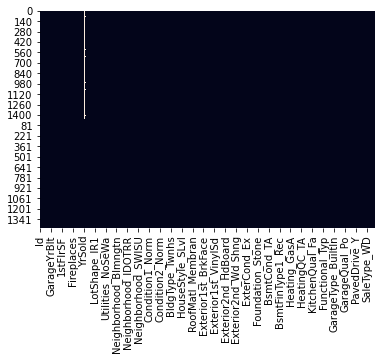

In [10]:

import seaborn as sns
sns.heatmap(df_tr.isnull(),cbar=False)

In [11]:
na_fea =pd.DataFrame(df_tr.isnull().sum(),columns=['na_count'])

In [12]:
for (row,rowdata) in na_fea.iterrows():
    if int(rowdata["na_count"])> 0:
        print(row)

SalePrice


In [13]:
df1 = df_tr[df_tr.isna().any(axis=1)]



In [14]:
df_evaluate = pd.DataFrame(df_tr[df_tr['SalePrice'].isna()])

In [15]:
df_evaluate = df_evaluate.drop("SalePrice",axis=1) 

<AxesSubplot:>

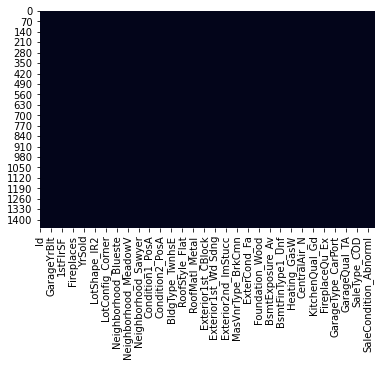

In [16]:
sns.heatmap(df_evaluate.isnull(),cbar=False)

In [17]:
train_f =df_tr.dropna()

In [18]:
train_f

,Id,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageYrBlt,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,-0.190476,1.180723,0.125089,0.000000,0.064212,0.140098,0.333333,0.0,0.560976,...,0,0,0,1,0,0,0,0,1,0
1,2,0.523810,0.000000,0.173281,0.000000,0.121575,0.206547,0.000000,0.5,-0.097561,...,0,0,0,1,0,0,0,0,1,0
2,3,-0.047619,0.975904,0.086109,0.000000,0.185788,0.150573,0.333333,0.0,0.512195,...,0,0,0,1,0,0,0,0,1,0
3,4,-0.428571,0.000000,0.038271,0.000000,0.231164,0.123732,0.333333,0.0,0.439024,...,0,0,0,1,1,0,0,0,0,0
4,5,0.714286,2.108434,0.116052,0.000000,0.209760,0.187398,0.333333,0.0,0.487805,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,-0.333333,0.000000,0.000000,0.000000,0.407962,0.155974,0.000000,0.0,0.463415,...,0,0,0,1,0,0,0,0,1,0
1456,1457,0.761905,0.716867,0.139972,0.110583,0.252140,0.252373,0.333333,0.0,-0.048780,...,0,0,0,1,0,0,0,0,1,0
1457,1458,-0.142857,0.000000,0.048724,0.000000,0.375428,0.188543,0.000000,0.0,-0.951220,...,0,0,0,1,0,0,0,0,1,0
1458,1459,-0.047619,0.000000,0.008682,0.698100,0.000000,0.176432,0.333333,0.0,-0.731707,...,0,0,0,1,0,0,0,0,1,0


In [19]:
y=train_f['SalePrice']
X=train_f.drop(['SalePrice','Id'],axis=1) 

X.shape

(1460, 275)

In [ ]:
#feature selection useing Tree-based feature selection using SelectFromModel to estimate each feature inpotance to pradict the terget variable 
#and feature with low varience can be removed by the model itself .

In [20]:
from sklearn import tree
from sklearn.feature_selection import SelectFromModel
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X,y)

In [21]:
model = SelectFromModel(clf, prefit=True)


In [24]:
import numpy as np
l1=list(np.take(X.columns,np.where(model.get_support()==True)[0]))

In [25]:
l1

['LotFrontage',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'GarageCars',
 'GarageArea',
 'LotArea',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'KitchenAbvGr',
 'WoodDeckSF',
 'MoSold',
 'CentralAir_N',
 'GarageType_Detchd']

In [27]:
#selecting the features in the list l1 from x 
X=X[l1]
X.shape

(1460, 18)

In [57]:
#createing model
from sklearn.linear_model import SGDRegressor

In [40]:
yhat

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
#createing the model: for this problem 

In [61]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(loss='lad',random_state=0)

In [62]:
model=reg.fit(X, y)

In [63]:
y_pred = model.predict(X)

In [64]:
y_pred

array([204533.42786833, 167012.16191099, 219231.78942346, ...,
       216342.86185066, 135090.75012391, 149474.87359725])

In [77]:
pred=pd.DataFrame(y_pred)
pred.columns =['SalePrice']
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)

datasets.to_csv('sample_submission1.csv',index=False)

In [69]:
pred.columns =['SalePrice']

In [70]:
pred

,SalePrice
0,204533.427868
1,167012.161911
2,219231.789423
3,164795.054736
4,287367.996724
...,...
1455,175361.822371
1456,212170.328145
1457,216342.861851
1458,135090.750124
